In [1]:

function midpoint(func, left, right, slice=1000000)
    range_arr = range(left, right, length=slice)
    arr = [(n) for n=range_arr]
    loop_size = size(arr, 1) - 1
    result = Array{Float64}(undef, loop_size)
    for n = 1:loop_size
        a = arr[n][1]
        b = arr[n+1][1]
        rule = (b - a)*func((a+b)/2)
        result[n] = rule
    end
    sum(result)
end

midpoint (generic function with 2 methods)

In [2]:
midpoint(x->x^2, 0, 1)

0.33333333333324994

In [3]:
function trapezoid(func, left, right, slice=1000000)
    arr_range = range(left, right, length=slice)
    arr = [(n, func(n)) for n=arr_range]
    loop_size = size(arr, 1) - 1
    result = Array{Float64}(undef, loop_size)
    for n = 1:loop_size
        a = arr[n][1]
        b = arr[n+1][1]
        fa = arr[n][2]
        fb = arr[n][2]
        rule = ((b-a)/2)*(fa+fb)
        result[n] = rule
    end
    sum(result)
end

trapezoid (generic function with 2 methods)

In [4]:
trapezoid(x->x^2, 0, 1)

0.333332833333

In [5]:
function simpson(func, left, right, slice=1000000)
    arr_range = range(left, right, length=slice)
    arr = [(n, func(n)) for n=arr_range]
    loop_size = size(arr, 1) - 1
    result = Array{Float64}(undef, loop_size)
    for n = 1:loop_size
        a = arr[n][1]
        b = arr[n+1][1]
        fa = arr[n][2]
        fb = arr[n+1][2]
        rule = ((b-a)/6) * fa + ((4(b-a))/6)*func((a+b)/2) + ((b-a)/6)*fb
        result[n] = rule
    end
    sum(result)
end

simpson (generic function with 2 methods)

In [6]:
simpson(x->x^2, 0, 1)

0.33333333333333337

In [7]:
function adaptive_quadrature(func, left, right, tol=1e-10)
    s1_length = 2
    s2_length = 4
    error = Inf
    s1 = 0
    s2 = 0
    while error > tol
        s1_arr_range = range(left, right, length=s1_length)
        s1_arr = [(n, func(n)) for n=s1_arr_range]
        s2_arr_range = range(left, right, length=s2_length)
        s2_arr = [(n, func(n)) for n=s2_arr_range]
        s1_loop_size = size(s1_arr, 1) - 1
        s2_loop_size = size(s2_arr, 1) - 1
        s1_result = Array{Float64}(undef, s1_loop_size)
        s2_result = Array{Float64}(undef, s2_loop_size)
        for n = 1:s1_loop_size
            s1_a = s1_arr[n][1]
            s1_b = s1_arr[n+1][1]
            s1_fa = s1_arr[n][2]
            s1_fb = s1_arr[n+1][2]
            s1_rule = ((s1_b-s1_a)/6) * s1_fa + ((4(s1_b-s1_a))/6)*func((s1_a+s1_b)/2) + ((s1_b-s1_a)/6)*s1_fb
            s1_result[n] = s1_rule
        end
        for n = 1:s2_loop_size
            s2_a = s2_arr[n][1]
            s2_b = s2_arr[n+1][1]
            s2_fa = s2_arr[n][2]
            s2_fb = s2_arr[n+1][2]
            s2_rule = ((s2_b-s2_a)/6) * s2_fa + ((4(s2_b-s2_a))/6)*func((s2_a+s2_b)/2) + ((s2_b-s2_a)/6)*s2_fb
            s2_result[n] = s2_rule
        end
        s1 = sum(s1_result)
        s2 = sum(s2_result)
        error = (s2-s1)/3
    end
    s2
end

adaptive_quadrature (generic function with 2 methods)

In [8]:
adaptive_quadrature(x->x^2, 0, 1)

0.3333333333333333

In [9]:
## Interpolation

In [10]:
px = [0 1 2]
py = [0 1 1]
n = length(px)
A = zeros(n, n)
for i = 1:n
    A[:, n-i+1] = px.^(i-1)
end
A

3×3 Array{Float64,2}:
 0.0  0.0  1.0
 1.0  1.0  1.0
 4.0  2.0  1.0

In [11]:
c = A\py'

3×1 Array{Float64,2}:
 -0.5
  1.5
  0.0

In [12]:
using Plots

In [13]:
x = range(-1,5, length=100)


-1.0:0.06060606060606061:5.0

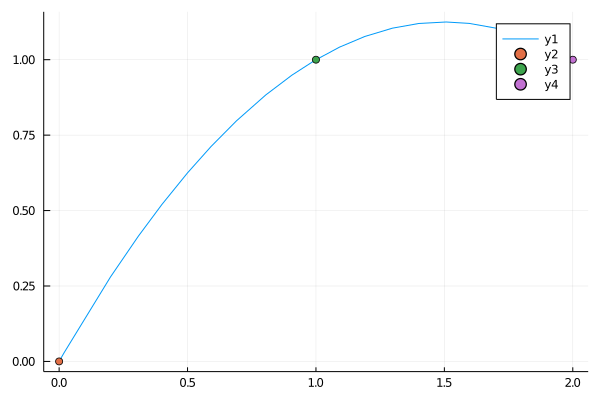

In [14]:
y(x) = c[1]x.^2 + c[2]x + c[3] 
plot(y, 0, 2)
scatter!(px, py)

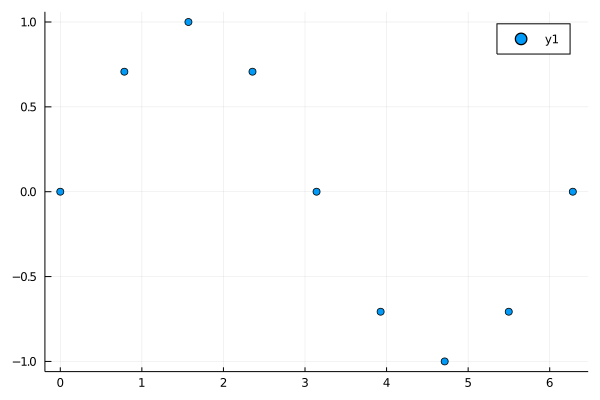

In [15]:
xs = 0:pi/4:2*pi
ys = sin.(xs)
scatter(xs, ys)


In [16]:
using Roots

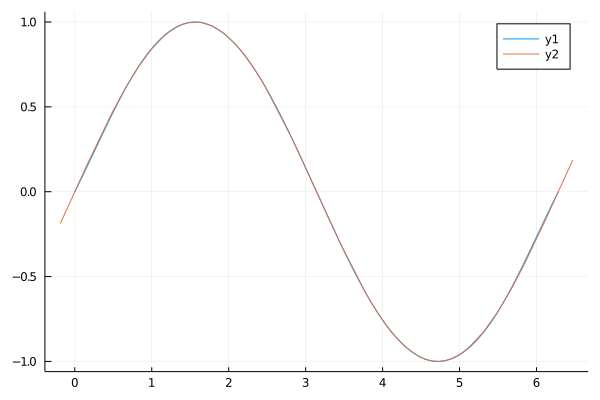

In [17]:
using DataInterpolations
xx = range(0, 2*pi, length=1000)
yy = CubicSpline(ys, xs)
plot(yy)
plot!(sin)

In [18]:

using Roots
using QuadGK
function bessel_roots()
    num_roots=5; num_functions=6;
    zeros_guess=[2.4  3.8  5.1  6  7.5  8.7;
                5.5 7 8.4 9.7 11 12;
                8.6 10 11.6 13 14 16;
                11.8 13 15 16 18 19;
                15 16.4 18 19.4 21 22]
    bzeros = zeros(5, 6)
    for k=1:num_roots
        for n=0:num_functions-1
            init_guess = zeros_guess[k, n+1];
            bessel(x) = (1/pi)*quadgk(theta-> cos(x*sin(theta)+n*theta), 0, pi, atol=1e-5)[1]
            zero = fzero(x->bessel(x), init_guess)
            bzeros[k, n+1] = zero;
        end
    end
    bzeros
end
bessel_roots()


5×6 Array{Float64,2}:
  2.40483   3.83171   5.13562   6.38016   7.58834   8.77148
  5.52008   7.01559   8.41724   9.76102  11.0647   12.3386
  8.65373  10.1735   11.6198   13.0152   14.3725   15.7002
 11.7915   13.3237   14.796    16.2235   17.616    18.9801
 14.9309   16.4706   17.9598   19.4094   20.8269   22.2178